In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
sales = pd.read_csv('sales.csv')
sales.head()

,cod_client,cod_product,date_sales,qty_product,sale_value
0,76320,3516,20180302,64.0,167776.00
1,76320,17164,20180302,160.0,78176.00
2,76320,21848,20180302,16.0,232.96
3,124272,23132,20180102,1600.0,107296.00
4,124272,23124,20180102,320.0,111776.00


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104078 entries, 0 to 104077
Data columns (total 5 columns):
cod_client     104078 non-null int64
cod_product    104078 non-null int64
date_sales     104078 non-null int64
qty_product    104078 non-null float64
sale_value     104078 non-null float64
dtypes: float64(2), int64(3)
memory usage: 4.0 MB


In [4]:
sales.describe()

,cod_client,cod_product,date_sales,qty_product,sale_value
count,104078.000000,104078.000000,1.040780e+05,104078.000000,1.040780e+05
mean,53391.569400,8934.583524,2.019032e+07,273.414399,7.086300e+04
std,44994.545404,8039.862194,6.760033e+03,1423.161777,8.770003e+04
min,48.000000,20.000000,2.018010e+07,16.000000,1.568000e+01
25%,16272.000000,2328.000000,2.018121e+07,96.000000,1.993600e+04
50%,38016.000000,5348.000000,2.019063e+07,192.000000,5.801600e+04
75%,86144.000000,10256.000000,2.019121e+07,320.000000,1.072960e+05
max,280224.000000,53640.000000,2.020052e+07,299520.000000,3.181024e+06


In [5]:
sales['year'] = sales['date_sales'].astype(str).apply(lambda x: x[:4])
sales['month'] = sales['date_sales'].astype(str).apply(lambda x: x[4:6])
sales['day'] = sales['date_sales'].astype(str).apply(lambda x: x[-2:])

In [6]:
date_18 = sales[sales['year'] == '2018']
date_19 = sales[sales['year'] == '2019']
date_20 = sales[sales['year'] == '2020']

## Question 01
What are the 10 best and least sold products in 2018, 2019 and 2020?

In [7]:
def sales_amount(df, year):
    
    cod_prod = df.cod_product.value_counts().index
    amount = df.cod_product.value_counts().values
    df_freq = pd.DataFrame({'cod_product': cod_prod, 'amount': amount})
    
    print(f'TOP 10 BEST PRODUCTS OF {year}')
    print(df_freq.iloc[:10,:])
    
    print(f'TOP 10 WORST PRODUCTS OF {year}')
    print(df_freq.iloc[:10,:])

In [8]:
# 2018
sales_amount(date_18, '2018')

TOP 10 BEST PRODUCTS OF 2018
   cod_product  amount
0         2128     565
1         4460     562
2         4464     562
3         4456     484
4         2324     448
5         2172     356
6         2116     348
7         2152     343
8         9756     325
9        17996     311
TOP 10 WORST PRODUCTS OF 2018
   cod_product  amount
0         2128     565
1         4460     562
2         4464     562
3         4456     484
4         2324     448
5         2172     356
6         2116     348
7         2152     343
8         9756     325
9        17996     311


In [9]:
# 2019
sales_amount(date_19, '2019')

TOP 10 BEST PRODUCTS OF 2019
   cod_product  amount
0         2128    1337
1         4464    1321
2         4460    1280
3         2324    1188
4         4456    1145
5         2116     845
6         2152     830
7         9824     827
8         2172     818
9         9756     776
TOP 10 WORST PRODUCTS OF 2019
   cod_product  amount
0         2128    1337
1         4464    1321
2         4460    1280
3         2324    1188
4         4456    1145
5         2116     845
6         2152     830
7         9824     827
8         2172     818
9         9756     776


In [10]:
# 2020
sales_amount(date_20, '2020')

TOP 10 BEST PRODUCTS OF 2020
   cod_product  amount
0         2128     552
1         2324     513
2         4464     474
3         4460     473
4         4456     439
5         9824     399
6         2116     361
7         2152     359
8         2192     343
9         2396     328
TOP 10 WORST PRODUCTS OF 2020
   cod_product  amount
0         2128     552
1         2324     513
2         4464     474
3         4460     473
4         4456     439
5         9824     399
6         2116     361
7         2152     359
8         2192     343
9         2396     328


## Question 02
What are the months with the highest and lowest revenue for the entire period?

In [11]:
def graph_revenue(df, title):
    values = df[['month','sale_value']].groupby('month').sum()/10**6
    plt.plot(values)
    plt.title(title)
    plt.xlabel('Months (Jan-Dec)')
    plt.ylabel('Revenue (in M)')
    plt.show

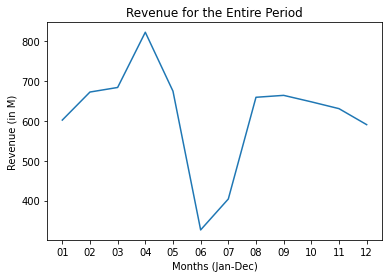

In [12]:
graph_revenue(sales, 'Revenue for the Entire Period')

## Question 03
What are the months with the highest and lowest revenue in 2018, 2019 and 2020?

In [13]:
def graph_revenue(df, title):
    values = df[['month','sale_value']].groupby('month').sum()/10**3
    plt.plot(values)
    plt.title(title)
    plt.xlabel('Months (Jan-Dec)')
    plt.ylabel('Revenue (in K)')
    plt.show

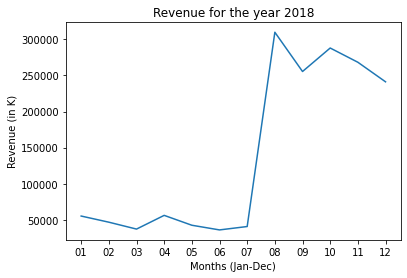

In [14]:
graph_revenue(date_18, 'Revenue for the year 2018')

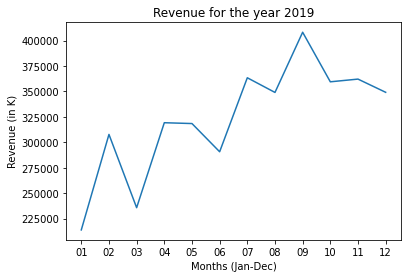

In [15]:
graph_revenue(date_19, 'Revenue for the year 2019')

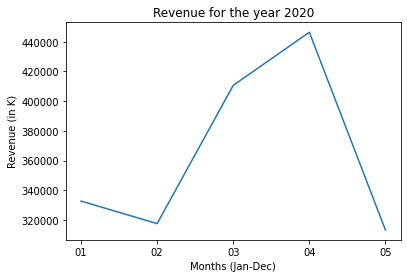

In [16]:
graph_revenue(date_20, 'Revenue for the year 2020')

## Question 04
What are the top 3 customers who buy more and less in sales?

In [17]:
df = sales[['cod_client','sale_value']].sort_values(['sale_value'])

In [18]:
print('TOP 3 BIGGEST BUYERS')
print(df.iloc[-3:,:])

TOP 3 BIGGEST BUYERS
        cod_client  sale_value
54419        78640   2613856.0
102558      128528   3181024.0
102624       18432   3181024.0


In [19]:
print('TOP 3 SMALLER BUYERS')
print(df.iloc[:3,:])

TOP 3 SMALLER BUYERS
      cod_client  sale_value
353        66192       15.68
1247      123984       15.68
1245      123984       15.68


## Question 05
Which are the top 3 customers who buy more and less in quantity of purchases?

In [20]:
df = sales[['cod_client','qty_product']].groupby(by=['cod_client']).sum().sort_values(by=['qty_product'])

In [21]:
print('TOP 3 BIGGEST BUYERS')
df.iloc[-3:,:]

TOP 3 BIGGEST BUYERS


,qty_product
cod_client,
23616,637824.0
9344,659040.0
35648,899216.0


In [22]:
print('TOP 3 SMALLER BUYERS')
df.iloc[:3,:]

TOP 3 SMALLER BUYERS


,qty_product
cod_client,
29664,16.0
288,16.0
130240,16.0


## Question 06
What is the average amount of sales per sale in 2018, 2019 and 2020?

In [23]:
print(f'Avarege of 2018: {date_18.sale_value.sum()/date_18.qty_product.sum()}')
print(f'Avarege of 2019: {date_19.sale_value.sum()/date_19.qty_product.sum()}')
print(f'Avarege of 2020: {date_20.sale_value.sum()/date_20.qty_product.sum()}')

Avarege of 2018: 214.6745838733727
Avarege of 2019: 262.43483390779033
Avarege of 2020: 310.2126973671565


## Question 07
What are the months with the highest and lowest average sales per year in 2018, 2019 and 2020?

In [24]:
def graph_revenue(df, title):
    df = df[['month','qty_product','sale_value']].groupby('month').sum()
    qty = df.iloc[:,0]
    value = df.iloc[:,1]
    average = value/qty
    plt.plot(average)
    plt.title(title)
    plt.xlabel('Months (Jan-Dec)')
    plt.ylabel('Revenue (in K)')
    plt.show

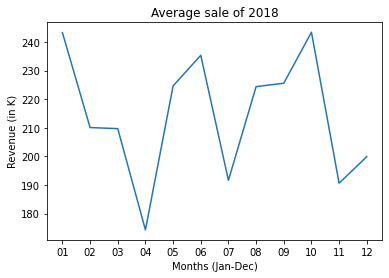

In [25]:
graph_revenue(date_18, 'Average sale of 2018')

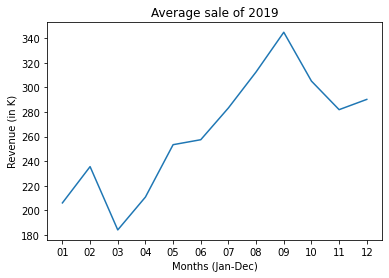

In [26]:
graph_revenue(date_19, 'Average sale of 2019')

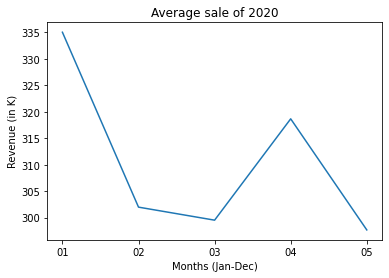

In [27]:
graph_revenue(date_20, 'Average sale of 2020')

## Question 08
What is the quarter with the highest revenue for the entire period?

In [28]:
print(f'Q1-18:',date_18[['month','sale_value']].groupby('month').sum().iloc[0:3,:].sum().values[0]/10**6)
print(f'Q2-18:',date_18[['month','sale_value']].groupby('month').sum().iloc[3:6,:].sum().values[0]/10**6)
print(f'Q3-18:',date_18[['month','sale_value']].groupby('month').sum().iloc[6:9,:].sum().values[0]/10**6)
print(f'Q4-18:',date_18[['month','sale_value']].groupby('month').sum().iloc[9:12,:].sum().values[0]/10**6)
print(f'Q1-19:',date_19[['month','sale_value']].groupby('month').sum().iloc[0:3,:].sum().values[0]/10**6)
print(f'Q2-19:',date_19[['month','sale_value']].groupby('month').sum().iloc[3:6,:].sum().values[0]/10**6)
print(f'Q3-19:',date_19[['month','sale_value']].groupby('month').sum().iloc[6:9,:].sum().values[0]/10**6)
print(f'Q4-19:',date_19[['month','sale_value']].groupby('month').sum().iloc[9:12,:].sum().values[0]/10**6)
print(f'Q1-20:',date_20[['month','sale_value']].groupby('month').sum().iloc[0:3,:].sum().values[0]/10**6)
print(f'Q2-20:',date_20[['month','sale_value']].groupby('month').sum().iloc[3:6,:].sum().values[0]/10**6)

Q1-18: 139.01790957151997
Q2-18: 134.58005189216
Q3-18: 605.9734766086414
Q4-18: 797.418324039681
Q1-19: 757.3657916742402
Q2-19: 928.4851552435218
Q3-19: 1120.837461531203
Q4-19: 1070.9193694863998
Q1-20: 1060.9615188099212
Q2-20: 759.7204303516799


## Question 09
In which month of the whole period was there the biggest sale of DISTINCT products?

In [29]:
sales[sales['sale_value'] == sales['sale_value'].max()]

,cod_client,cod_product,date_sales,qty_product,sale_value,year,month,day
102558,128528,2304,20200515,96.0,3181024.0,2020,05,15
102624,18432,2304,20200515,16.0,3181024.0,2020,05,15


## Question 10
In which quarter was the lowest sale of DISTINCT products?

In [30]:
sales[sales['sale_value'] == sales['sale_value'].min()][['month','year']]

,month,year
353,01,2018
1245,02,2018
1246,02,2018
1247,02,2018
